In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
# The Digits MNIST data is available directly in the tf.keras datasets API

mnist = tf.keras.datasets.mnist

In [0]:
# load_data will give you two sets of two lists, 
# training and testing values that contain the clothing items and their labels.

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

In [10]:
# print shape and data type

print(training_images.shape, training_images.dtype)
print(training_labels.shape, training_labels.dtype)
print(test_images.shape, test_images.dtype)
print(test_labels.shape, test_labels.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [11]:
# labels

print(training_labels[:10])
print(test_labels[:10])

[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


5


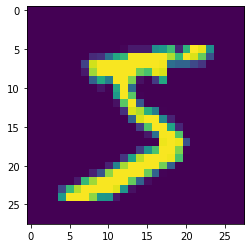

In [12]:
# plot images

plt.imshow(training_images[0])
print(training_labels[0])

In [13]:
# For various reasons it's easier if we treat all values as between 0 and 1
# a process called 'normalizing'

training_images = training_images/255.0
test_images = test_images/255.

print(training_images.shape, training_images.dtype)
print(test_images.shape, test_images.dtype)

(60000, 28, 28) float64
(10000, 28, 28) float64


In [0]:
# Sequential: That defines a sequence of layers in the neural network
# Flatten: Flatten just takes multidiamentional array and turns it into a 1D array
# Dense: Adds a layer of neurons

# Activation function: Each layer of neurons need it, to tell them what to do. There's lots of options.
#   Relu means "If X>0 return X, else return 0"
#     so it only passes values 0 or greater to the next layer.
#   Softmax takes a set of values, and effectively picks the biggest one, 
#     if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
#     it turns it into [0,0,0,0,1,0,0,0,0]

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [15]:
# Loss function —This measures how accurate the model is during training. 
#   You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated 
#    based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. 
#   The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
history = model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2612 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1160 - acc: 0.9663
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0787 - acc: 0.9765
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0596 - acc: 0.9819
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0461 - acc: 0.9858


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


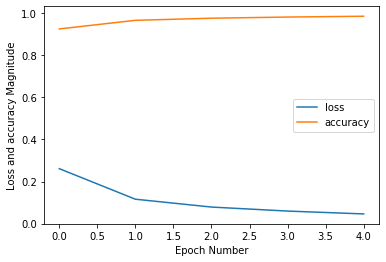

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss and accuracy Magnitude")
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['acc'], label='accuracy')
plt.legend()
plt.show()

In [19]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0761 - acc: 0.9764


[0.07607561628965195, 0.9764]

In [0]:
classifications = model.predict(test_images)

[1.8578083e-08 2.2941824e-09 1.1470875e-05 9.9168581e-05 1.1025294e-10
 2.0072446e-09 2.9688396e-14 9.9987566e-01 1.3038328e-07 1.3543760e-05]
7


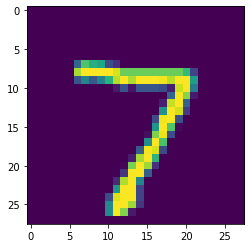

In [21]:
print(classifications[0])
plt.imshow(test_images[0])
print(test_labels[0])